# Introduction

Continuing the project of the risk assessment model, we will inmplement a non-unitary operator by following the method propposed by Lin et al. (2021) in their Appendix D. 

# Defining the non-unitary operator

We want an operator that has the following effect:

\begin{align*}
    \hat U |1 \rangle &= e^{i \gamma} |1 \rangle \\
    \hat U |0 \rangle &= e^{i \phi_+} \sqrt{1-a}|0 \rangle + e^{i \phi_-}\sqrt{a}|1 \rangle
\end{align*}

With global phase $e^{i \gamma}$ and relative phases $e^{i \phi_+}, e^{i \phi_-}$. This is because we want the state $|1\rangle$ to be preserved, and the state $|0\rangle$ to be transformed into a superposition with a probability of ending up in $|1\rangle$ equal to $a$ (simplified from $a_{ij}$ as the probability of $i$ failing given a dependency $j$ failed). To obtain the matrix representation in the $|0\rangle-|1\rangle$, we can take the following steps,

\begin{align*}
    \hat U |0 \rangle &= e^{i \phi_+} \sqrt{1-a}|0 \rangle + e^{i \phi_-}\sqrt{a}|1 \rangle \\
    \left( \hat U  - e^{i \phi_+} \sqrt{1-a} \right) |0 \rangle &= e^{i \phi_-}\sqrt{a}|1 \rangle
\end{align*}

Taking the kets,

\begin{align*}
    \langle 0 | \left(\hat U  - e^{i \phi_+} \sqrt{1-a} \right) |0 \rangle &=  \langle 0 | e^{i \phi_-}\sqrt{a}|1 \rangle \\
    \langle 0 | \hat U |0 \rangle -\langle 0 | e^{i \phi_+} \sqrt{1-a} |0 \rangle &= 0 \\
    \langle 0 | \hat U |0 \rangle &= e^{i \phi_+} \sqrt{1-a}\\
    \\
    \langle 1 | \left(\hat U  - e^{i \phi_+} \sqrt{1-a} \right) |0 \rangle &=  \langle 1 | e^{i \phi_-}\sqrt{a}|1 \rangle \\
    \langle 1 | \hat U |0 \rangle -\langle 1 | e^{i \phi_+} \sqrt{1-a} |0 \rangle &= e^{i \phi_-}\sqrt{a} \\
    \langle 1 | \hat U |0 \rangle &= e^{i \phi_-}\sqrt{a} \\
    \\
    \langle 0 | \hat U | 1 \rangle &= \langle 0 | e^{i \gamma} |1 \rangle \\
    \langle 0 | \hat U | 1 \rangle &= 0 \\
    \\
    \langle 1 | \hat U | 1 \rangle &= \langle 1 | e^{i \gamma} |1 \rangle \\
    \langle 1 | \hat U | 1 \rangle &= e^{i \gamma}
\end{align*}

Therefore, in matrix representation,

\begin{align*}
    \hat{U} &=  \begin{bmatrix} \langle 0 | \hat U | 0 \rangle && \langle 0 | \hat U | 1 \rangle \\\langle 1 | \hat U | 0 \rangle && \langle 1 | \hat U | 1 \rangle  \end{bmatrix} \\ &= \begin{bmatrix}
    e^{i \phi_+} \sqrt{1-a} & 0 \\
    e^{i \phi_-} \sqrt{a} & e^{i \gamma}\end{bmatrix}
\end{align*}


* The probabilities don't quite work when setting the phases to zero. They would work for the states $|0\rangle, |1\rangle$, but not for the superpositions. You could try writing them down in pen and paper. We need to fix it
* In the code below, you could run for different $a_{ij}$, and would work well for $a_{ij}=0$, but not for other values. 
* In particular, as we get close to $a_{ij} = 1$, the probability is around $50 \%$ instead of $100\%$. The probabilities are also larger than they should as we pick a small $a_{ij}$.

# Controlled operation

We wish to apply the following non-unitary operator to the qubit $q_i$, in a system of $n$ qubits

\begin{equation}
    U_{ij}( \Delta t) = \begin{bmatrix} \sqrt{1-a_{ij}} && 0 \\ \sqrt{a_{ij}} && 1 \end{bmatrix}
\end{equation}

Using the direct product notation on all qubits, we obtain

\begin{equation}
    U(\Delta t) = I_1 \otimes I_2 \otimes \dots \otimes U_{ij}(\Delta t) \otimes \dots \otimes I_N 
\end{equation}

Where the $I_k$ is the identity operation acting on qubit $q_k$. 

We are, however, interested in applying $U_{ij}$ with a control on $j$, which has the direct-product representation of

\begin{align*}
    CU_{ij} &= I_1 \otimes I_2 \otimes \ldots  |0\rangle \langle 0| \otimes I_{j+1} \ldots \otimes I_n  + I_1 \otimes I_2 \otimes \ldots  |0\rangle \langle 0| \otimes I_{j+1} \ldots \otimes U_{ij} \otimes I_{i+1} \ldots \otimes I_n \\
    &= \left( \bigotimes_{\substack{k=1 \\ k \neq i, j}}^{n} I_k \right) \left( |0\rangle\langle 0|_j \otimes I_i + |1\rangle\langle 1|_j \otimes U_{ij} \right)
\end{align*}

# Embedding into an Ancilla

In an system with $n+1$ qubits, where $q_{n+1}$ acts as an ancilla, we need to find the operator $U_A$. Notice we dropped the input $\Delta t$ to simplify notation. 

\begin{equation}
    U_A= \begin{bmatrix} s U_{ij} && B \\ C && D\end{bmatrix}
\end{equation}

Where $U_A$ is a $2^{n+1} \times 2^{n+1}$ matrix, and $s^{-2}$ is the maximum eigenvalue of $CU_{ij}^\dagger CU_{ij}$. 

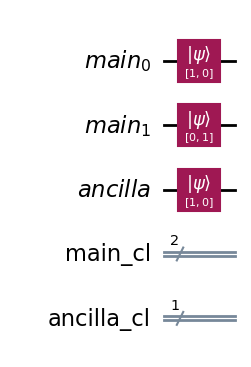

In [1]:
# Initialize the circuit

from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

import numpy as np

# Step 1: Initialize Quantum Circuit with 2 qubits and 1 ancilla
n = 2 #number of qubits
main_qubits = QuantumRegister(n, 'main')
ancilla_qubits = QuantumRegister(1, 'ancilla')

main_clbits = ClassicalRegister(n, 'main_cl')
ancilla_clbits = ClassicalRegister(1, 'ancilla_cl')

qc = QuantumCircuit(main_qubits, ancilla_qubits, main_clbits, ancilla_clbits)

qc.initialize([1, 0], 0)  # |0⟩ state for qubit 0
qc.initialize([0, 1], 1)  # |1⟩ state for qubit 1
qc.initialize([1, 0], 2)  # |0⟩ state for ancilla

qc.draw('mpl')

In [2]:
# Transform the direct product notation to
# the 2^n x 2^n matrix notation for n qubits

import numpy as np
from qiskit.circuit import Parameter

def kronecker_product(matrices):
    """Compute the Kronecker product of a list of matrices."""
    result = np.eye(1)
    for matrix in matrices:
        result = np.kron(result, matrix)
    return result

# Step 1: Define identity and U_ij operators
I = np.eye(2)
a_ij = 0.2
U_ij = np.array([[np.sqrt(1 - a_ij), 0], 
                [np.sqrt(a_ij), 1]])
print(U_ij)

# Step 2: Construct the controlled operator in 2^n x 2^n form
control = 1
target = 0

# Create list of operators for Kronecker product
operators = [I] * (n)
operators[control] = np.array([[1, 0], [0, 0]])  # |0⟩⟨0|
CU_0 = kronecker_product(operators)  # First part: applies identity if control is |0⟩

operators = [I] * (n)
operators[control] = np.array([[0, 0], [0, 1]])  # |1⟩⟨1|
operators[target] = U_ij
CU_1 = kronecker_product(operators)  # Second part: applies U if control is |1⟩

CU = CU_0 + CU_1  # Combine both parts

print("Controlled Operator (2^n x 2^n):")
print(CU)
print(CU.shape)

[[0.89442719 0.        ]
 [0.4472136  1.        ]]
Controlled Operator (2^n x 2^n):
[[1.         0.         0.         0.        ]
 [0.         0.89442719 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.4472136  0.         1.        ]]
(4, 4)


In [3]:
# Calculating the singular value decomposition

from scipy.linalg import svd, qr

# Step 1: Compute SVD of CU
U_, Sigma, Vh = svd(CU)

# Step 2: Find scaling factor s (largest eigenvalue of CU†CU)
s2 = np.max(Sigma**2) # sigma contains the square root of the eigenvalues of CU†CU
s = 1 / np.sqrt(s2)

# Step 3: Construct C from Sigma
Sigma_tilde = np.sqrt(np.maximum(0, 1 - s**2 * Sigma**2))
# We take the maximum because all the values should be non-negative
# and rounding might lead to negative values
C = U_ @ np.diag(Sigma_tilde) @ Vh

# Step 4: Create a random B and D for the unitary block
B_tilde = np.random.rand(CU.shape[0], CU.shape[0])
D_tilde = np.random.rand(CU.shape[0], CU.shape[0])

# Step 5: Construct ŨA and apply QR decomposition
U_tilde = np.block([[s * CU, B_tilde], [C, D_tilde]])
UA, _ = qr(U_tilde)  # Final Unitary Operator

print(f"Maximum eigenvalue: {s2}")
print(f"s = {s}")
print(UA.shape)

Maximum eigenvalue: 1.4472135954999577
s = 0.8312538755549069
(8, 8)


In [4]:
# Check if the matrix is unitary
def is_unitary(matrix, tol=1e-10):
    identity = np.eye(matrix.shape[0])
    return np.allclose(matrix @ matrix.conj().T, identity, atol=tol) and \
           np.allclose(matrix.conj().T @ matrix, identity, atol=tol)

print(is_unitary(UA))  # Should print True

True


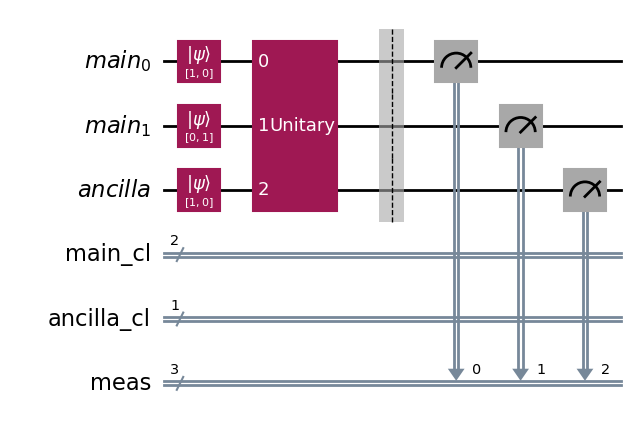

In [5]:
# Adding it into the quantum circuit
# and adding measurements

import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate

gate = UnitaryGate(UA)
qc.append(gate,list(range(n+1)))
#qc.measure(main_qubits, main_clbits)
qc.measure_all()
qc.draw('mpl')

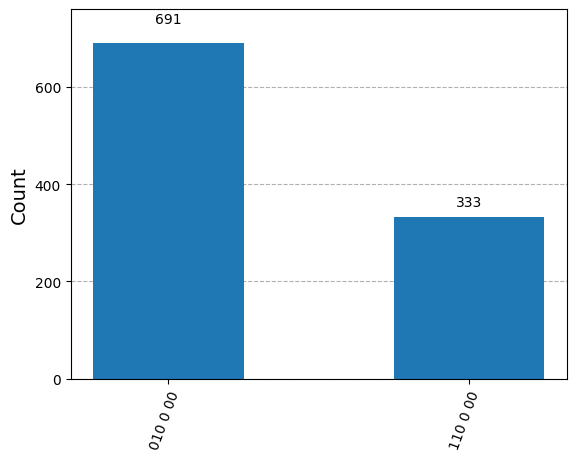

In [6]:
# Simulator. It should end up with qubit 0 being |0>
# because we set a_ij = 0
# We observe that :) 
# Probabilities break when setting a_ij > 0, so we
# need to find a way to work with the global and
# relative phases in the theoretical side

import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Set up simulator (BackendV2 workflow)
simulator = Aer.get_backend('aer_simulator')

# Step 2: Transpile and run the circuit using updated method
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# Step 3: Get and visualize results
counts = result.get_counts()
plot_histogram(counts)


# References

Lin, S., Dilip, R., Green, A. G., Smith, A., & Pollmann, F. (2021). Real- and Imaginary-Time Evolution with Compressed Quantum Circuits. PRX Quantum, 2(1). https://doi.org/10.1103/prxquantum.2.010342